# 프로젝트 설명

- 이번 프로젝트에서는 내일의 날씨를 예측하는 모델을 만들어 보려고 합니다.
- 분류 알고리즘을 통해 비가 온다 or 비가 오지 않는다 의 이진분류 문제로 모델을 만들어 보시기 바랍니다.
- 여러가지 분류 모델을 생성해 보고 가장 높은 정확도를 보이는 모델을 찾아보세요!

# 데이터 설명

호주 기상청에서 10년동안 매일의 날씨를 관측한 데이터입니다.

RainTomorrow 변수가 예측하고 싶은 타겟 변수입니다. - 내일 비가 올까요? 오지 않을까요?   
비가 온다면 Yes, 비가 오지 않는 다면 No로 설정되어 있습니다.  
비가 오는 것의 기준은 강수량이 1mm 이상일 경우입니다.  

---
데이터 변수 설명

- Date : 관측 날짜  
- Location : 관측 장소  
- MinTemp : 최저 온도(섭씨)  
- MaxTemp : 최고 온도(섭씨)  
- Rainfall : 하루 동안 기록된 강우량(mm)  
- Evaporation : 24시간 동안 A급 팬 증발 (9am기준) -> A급 팬이라는 도구로 측정한 증발 양
- Sunshine : 밝은 햇빛이 비치고 있던 시간
- WindGustDir : 24시간 동안 가장 강한 바람이 불었던 방향 (자정기준)
- WindGustSpeed : 24시간 동안 가장 강했던 바람의 속도 (km/h)
- WinDir9am : 오전 9시 바람의 방향
- WinDir3pm : 오후 3시 바람의 방향
- WinSpeed9am : 오전 9시부터 10분간 풍속의 평균
- WinSpeed3pm : 오후 3시부터 10분간 풍속의 평균
- Humidity9am : 오전 9시의 습도
- Humidity3pm : 오후 3시의 습도
- Pressure9am : 평균 해면높이에서 관측된 값으로 환산한 대기압 (오전 9시 기준)
- Pressure3pm : 평균 해면높이에서 관측된 값으로 환산한 대기압 (오후 3시 기준)
- Cloud9am : 하늘이 구름에 가려진 정도, 8개로 구분지어진 "oktas" 단위 활용 (오전 9시 기준)
- Cloud3pm : 하늘이 구름에 가려진 정도, 8개로 구분지어진 "oktas" 단위 활용 (오후 3시 기준)
- Temp9am : 오전 9시의 섭씨 온도 
- Tmep3am : 오후 3시의 섭씨 온도
- RainToday : 오늘 오전 9시까지 24시간동안 1mm이상 강수량이 있었으면 yes, 아니라면 no.
- RainTomorrow : 내일 오전 9시까지 24시간동안 1mm이상 강수량이 있었으면 yes, 아니라면 no. (결과변수)

### 데이터 불러오기

In [267]:
## 상품 수령울 위한 이름과 연락처를 주석으로 입력해주세요.
## 이름 : 김동욱
## 연락처 : jayk01213@ajou.ac.kr

In [268]:
## 필요한 패키지들을 불러오세요.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

import numpy as np


In [269]:
## 주어진 파일명을 활용하여 데이터를 불러와 할당해 보세요. (weatherAUS.csv)
df = pd.read_csv("../data/weatherAUS.csv")

In [270]:
## 데이터가 어떻게 생겼는지 5개 정도 row를 출력하여 확인해보세요.
df.head(1000000) # we can do 'df.head()', but wanted to see how many data we have



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No



### 데이터 전처리

In [271]:
## 데이터에 결측치가 얼마나 있는지 칼럼별로 확인해 보세요.
df.isnull().sum()




Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [272]:
## 데이터가 너무 적은 칼럼과 분석 목표와 무관한 칼럼은 삭제해 보세요.
df_drop = df.drop(['Date', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis=1) 
# WindDir seems meaningless / Cloud, Evap, Sunshine have too many missing values / WindSpeed with time seems too complicative to use(overfit) / date is difficult to use

df_drop.head(1000000)

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,31.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,22.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,37.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,28.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [273]:
## 결측치를 제거해 보세요.
df_drop_dropna = df_drop.dropna(how='any')  # drop any data with missing value
print(df_drop_dropna.isnull().sum())
df_drop_dropna.head(1000000)


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,31.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,31.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,22.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,37.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
MinTemp             22
MaxTemp            107
Rainfall         23964
WindGustSpeed     2656
Humidity9am       1131
Humidity3pm          0
Pressure9am       1203
Pressure3pm        941
Temp9am             56
Temp3pm            225
Location             0
RainToday            0
RainTomorrow         0
dtype: int64
original_df : 119702
IQR_df : 92175


array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>],
       [<AxesSubplot:title={'center':'Temp3pm'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

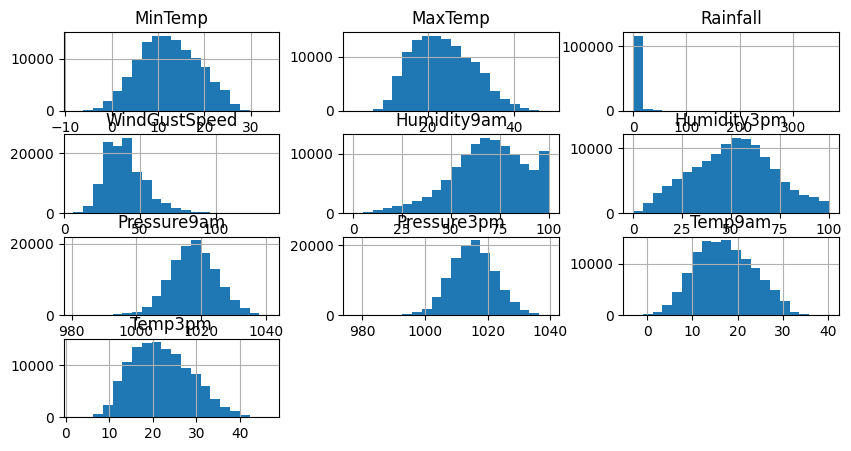

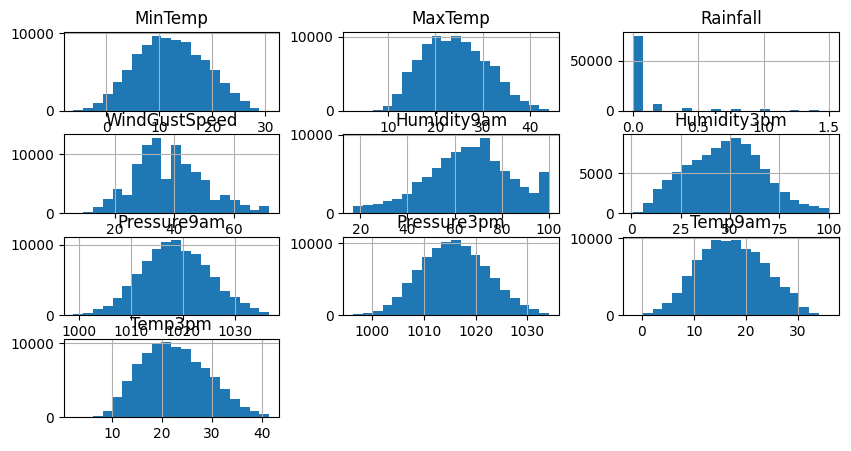

In [274]:
## 이상치를 규정하고 제거해보세요.

original_df_drop_dropna = df_drop_dropna

Q1 = df_drop_dropna[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(q=0.25)
Q3 = df_drop_dropna[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(q=0.75)

IQR = Q3-Q1

IQR_df = df_drop_dropna[(df_drop_dropna[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']] <= Q3+1.5*IQR) & (df_drop_dropna[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']] >= Q1-1.5*IQR)]

IQR_df = IQR_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]
IQR_df[['Location', 'RainToday', 'RainTomorrow']] = df_drop_dropna[['Location', 'RainToday', 'RainTomorrow']]

print(original_df_drop_dropna.isnull().sum())
print(IQR_df.isnull().sum())

IQR_df = IQR_df.dropna(how='any')
print('original_df :', len(original_df_drop_dropna))
print('IQR_df :', len(IQR_df))

original_df_drop_dropna.hist(bins=20, figsize=(10,5))
IQR_df.hist(bins=20, figsize=(10,5))

# removing outliers with numerical feature of data


<AxesSubplot:>

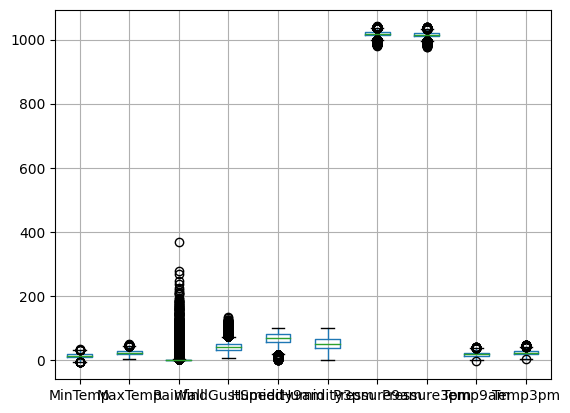

In [275]:
original_df_drop_dropna.boxplot() # Original data frame

<AxesSubplot:>

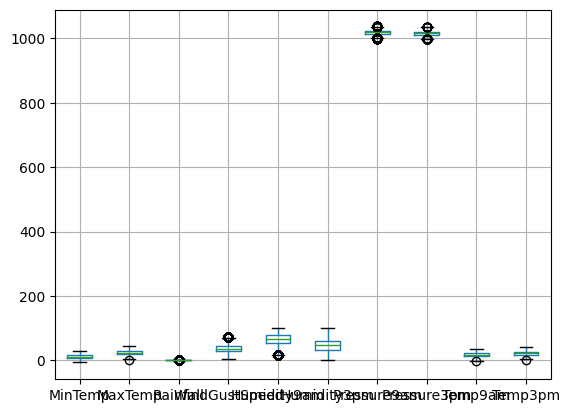

In [276]:
IQR_df.boxplot() # data frame after outlier remove

In [277]:
## 범주형 칼럼들을 머신러닝에 활용할 수 있게 숫자로 변경해 보세요.

# use pd.factorize to categorical -> numeric

IQR_df['Location'] = pd.factorize(IQR_df['Location'])[0]
IQR_df['RainToday'] = pd.factorize(IQR_df['RainToday'])[0]
IQR_df['RainTomorrow'] = pd.factorize(IQR_df['RainTomorrow'])[0]
IQR_df.head(1000000)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,0
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,0
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,0
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,0
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,59.0,27.0,1024.7,1021.2,9.4,20.9,43,0,0
145455,2.8,23.4,0.0,31.0,51.0,24.0,1024.6,1020.3,10.1,22.4,43,0,0
145456,3.6,25.3,0.0,22.0,56.0,21.0,1023.5,1019.1,10.9,24.5,43,0,0
145457,5.4,26.9,0.0,37.0,53.0,24.0,1021.0,1016.8,12.5,26.1,43,0,0


In [278]:
## 데이터를 스케일링하여 범위를 맞추어 주세요.

df_norm = (IQR_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]-IQR_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].min())/(IQR_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].max()-IQR_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].min())

df_norm[['Location', 'RainToday', 'RainTomorrow']] = IQR_df[['Location', 'RainToday', 'RainTomorrow']]

df_norm.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,RainToday,RainTomorrow
0,0.531165,0.490338,0.400000,0.575758,0.650602,0.212121,0.232000,0.284960,0.494681,0.497449,0,0,0
1,0.368564,0.543478,0.000000,0.575758,0.325301,0.242424,0.309333,0.303430,0.502660,0.561224,0,0,0
2,0.517615,0.557971,0.000000,0.606061,0.253012,0.292929,0.229333,0.327177,0.603723,0.533163,0,0,0
3,0.417344,0.613527,0.000000,0.272727,0.337349,0.151515,0.496000,0.435356,0.526596,0.617347,0,0,0
4,0.642276,0.717391,0.666667,0.530303,0.783133,0.323232,0.314667,0.255937,0.518617,0.698980,0,0,0
5,0.563686,0.654589,0.133333,0.757576,0.457831,0.222222,0.272000,0.240106,0.593085,0.678571,0,0,0
6,0.555556,0.541063,0.000000,0.666667,0.385542,0.181818,0.282667,0.313984,0.526596,0.568878,0,0,0
7,0.376694,0.582126,0.000000,0.439394,0.373494,0.181818,0.384000,0.364116,0.478723,0.591837,0,0,0
9,0.523035,0.664251,0.933333,0.333333,0.493976,0.262626,0.213333,0.248021,0.579787,0.660714,0,1,0
10,0.531165,0.671498,0.000000,0.363636,0.373494,0.212121,0.341333,0.327177,0.587766,0.676020,0,0,1


### 변수선택 

In [279]:
## 모델링에 사용할 변수를 선택해 보세요.
rain_df = pd.DataFrame()
rain_df[['Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']] = df_norm[['Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']]

# Chose 3 most meaningful features to predict I think

rain_df.head(1000000)

,Rainfall,Humidity3pm,RainToday,RainTomorrow
0,0.400000,0.212121,0,0
1,0.000000,0.242424,0,0
2,0.000000,0.292929,0,0
3,0.000000,0.151515,0,0
4,0.666667,0.323232,0,0
...,...,...,...,...
145454,0.000000,0.262626,0,0
145455,0.000000,0.232323,0,0
145456,0.000000,0.202020,0,0
145457,0.000000,0.232323,0,0


In [280]:
## 예측에 활용할 변수들을 X에, 예측 대상인 RainTomorrow 변수를 y에 할당해 보세요.

rain_df = rain_df.rename(columns = {'Rainfall' : 'X1', 'Humidity3pm' : 'X2', 'RainToday' : 'X3', 'RainTomorrow' : 'y'})

rain_df.head(10000000)


,X1,X2,X3,y
0,0.400000,0.212121,0,0
1,0.000000,0.242424,0,0
2,0.000000,0.292929,0,0
3,0.000000,0.151515,0,0
4,0.666667,0.323232,0,0
...,...,...,...,...
145454,0.000000,0.262626,0,0
145455,0.000000,0.232323,0,0
145456,0.000000,0.202020,0,0
145457,0.000000,0.232323,0,0


### 모델생성

In [281]:
## 여러가지 모델을 생성해 보고 Accuracy 기준으로 가장 성능이 좋은 모델을 찾아보세요! 
# model 1 uses linear regression
model1 = LinearRegression()

X = rain_df[['X1', 'X2', 'X3']]
y = rain_df[['y']]

model1.fit(X, y)

y_pred = model1.predict(X)
for i, y in enumerate(y_pred):
  if y < 0.5:
    y_pred[i] = 0
  else:
    y_pred[i] = 1

correct = 0

for y, y_p in zip(rain_df[['y'][0]], y_pred):
  if y == y_p:
    correct += 1
  

print(correct/ len(y_pred))

0.8522592893951723


In [282]:
## 여러가지 모델을 생성해 보고 Accuracy 기준으로 가장 성능이 좋은 모델을 찾아보세요! 
# model 2 uses support vector machine with linear kernel

model2 = svm.SVC(kernel='linear')

X = rain_df[['X1', 'X2', 'X3']]
y = rain_df[['y']]

model2.fit(X, np.ravel(y))

y_pred = model2.predict(X)
for i, y in enumerate(y_pred):
  if y < 0.5:
    y_pred[i] = 0
  else:
    y_pred[i] = 1

correct = 0

for y, y_p in zip(rain_df[['y'][0]], y_pred):
  if y == y_p:
    correct += 1
  
print(correct/ len(y_pred))


0.8497748847301329


In [283]:
## 여러가지 모델을 생성해 보고 Accuracy 기준으로 가장 성능이 좋은 모델을 찾아보세요! 
# model 3 uses support vector machine with rbf kernel

model3 = svm.SVC(kernel='rbf')

X = rain_df[['X1', 'X2', 'X3']]
y = rain_df[['y']]

model3.fit(X, np.ravel(y))

y_pred = model3.predict(X)
for i, y in enumerate(y_pred):
  if y < 0.5:
    y_pred[i] = 0
  else:
    y_pred[i] = 1

correct = 0

for y, y_p in zip(rain_df[['y'][0]], y_pred):
  if y == y_p:
    correct += 1
  
print(correct/ len(y_pred))


0.8675779766748034


In [284]:
## 여러가지 모델을 생성해 보고 Accuracy 기준으로 가장 성능이 좋은 모델을 찾아보세요! 
# model 4 uses KNN classifier

model4 = KNeighborsClassifier(n_neighbors = 3)

X = rain_df[['X1', 'X2', 'X3']]
y = rain_df[['y']]

model4.fit(X, np.ravel(y))

y_pred = model4.predict(X)
for i, y in enumerate(y_pred):
  if y < 0.5:
    y_pred[i] = 0
  else:
    y_pred[i] = 1

correct = 0

for y, y_p in zip(rain_df[['y'][0]], y_pred):
  if y == y_p:
    correct += 1
  
print(correct/ len(y_pred))

0.8313859506373745


In [ ]:
# Best model was model3; SVM with rbf kernel, with 0.867 accuracy.